## Image Segmentation

### Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
# Required to calculate Dice Similarity Coefficient

from PIL import Image, ImageOps

# Reduce size of original image to reduce computation time
size = (100, 100)


#### Function for displaying images

In [29]:
def plot_two_images(figure_title, image1, label1, image2, label2, 
                    cmap1=None, cmap2=None):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1, cmap = cmap1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image2, cmap = cmap2)
    plt.axis('off')
    plt.title(label2)

    plt.show()

#### Function for applying MeanShift algorithm

In [60]:
def apply_meanshift(img):
    # Step 1 - Extract the three RGB colour channels
    (r, g, b) = Image.Image.split(img)
    
    img_arr = np.array(img)

    # Step 2 - Store original image shape to be used later in resizing
    shape = img_arr.shape
    # Combine thet hree colour channels by flattening each channel
    # Then stack the flattened channels together
    # This gives the "colour_samples"
    # colour_samples = np.stack((img_arr[:,:,0].flatten(), img_arr[:,:,1].flatten(), img_arr[:,:,2].flatten()))
    colour_samples = np.reshape(img_arr, [-1,3])
    
    # Step 3 - Perform MeanShift clustering
    # For larger images this may take a few minutes to compute
    
    bandwidth = estimate_bandwidth(colour_samples)
    ms_clf = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms_clf.fit(colour_samples)
    ms_labels = ms_clf.labels_

    # Step 4 - Reshape ms_labels back to the original image shape
    # for displaying the segmentation output
    ms_labels = np.reshape(ms_labels, shape[:2])
    

    return ms_labels

#### Function for applying Watershed algorithm

In [64]:
def apply_watershed(img, threshold=None, plotDistTransform = False):
    
    # TODO: Apply Watershed to image
    # Consider the following hints as per the lab specification
    
    # Convert to binary image (note: can also use cv thresholding)
    if threshold is not None:
        img_grey = img_grey.point(lambda x: 0 if x < threshold else 255, '1')

    # Step 1 - Convert the image to grayscale and then binary
    # and convert the image to a numpy matrix
    img_grey = ImageOps.grayscale(img)
    img_array = np.array(img_grey)
    
    # Step 2 - Calculate the distance transform
    # Hint: Use ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
    # why do you even bother making this a step if you literally include the code in the comment
    
    # Remember to plot distance transform for Task 2
    
    # Step 3 - Generate the Watershed markers
    # Hint: Use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # Remember to change the local search region for good segmentation results
    # using ndi.label() (note the markers are the 0th output of this function)
    d = ndi.distance_transform_edt(img_array)
    local_max = peak_local_max(d, footprint=np.ones((3,3)), labels=img_array)
    m = np.zeros(d.shape)
    m[tuple(local_max.T)] = True
    markers = ndi.label(m)[0]
    
    # Step 4 - Perform Watershed and store the labels
    # Hint: Use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-d, m, mask=img_array)
    
    return ws_labels, distance

### Q1. Use the MeanShift algorithm for image segmentation

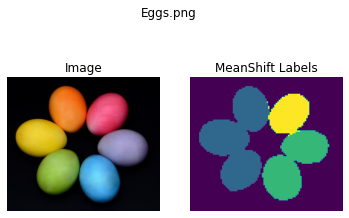

In [61]:
# Specify path to the test image
img_path = 'Eggs.png'

# Read image
img = Image.open(img_path)
img.thumbnail(size)

# Apply MeanShift algorithm to the image
ms_labels = apply_meanshift(img) # change here


# Read and plot the original image and MeanShift result
img = Image.open(img_path) # change here

plot_two_images(img_path, img, "Image", ms_labels, "MeanShift Labels")

### Q2. Use Watershed transformation for image segmentation

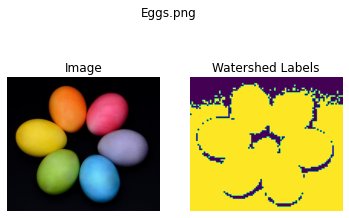

In [65]:
# Read image from img_path as specified above
img = Image.open(img_path)
img.thumbnail(size)

# Apply Watershed algorithm (remember to plot distance transform as well)
ws_labels, distance = apply_watershed(img)

# Read the original image
img = Image.open(img_path)

plot_two_images(img_path, img, "Image", ws_labels, "Watershed Labels")

### Q3. Compare MeanShift and Watershed segmentation results

In [ ]:
# List of MaskX.png images
MaskX = ['Mask{}.png'.format(str(idx)) for idx in range(1,7)]

# Generate list of unique MeanShift labels and corresponding label image masks
lbl_ms_unique = np.unique(ms_labels)
ms_masks =

# Generate list of unique Watershed labels and corresponding label image masks
# Hint: Make sure you have generated reasonable watershed segmentation results
lbl_ws_unique = np.unique(ws_labels)
ws_masks =

# Iterate over MaskX.png images and calculate DSC
for each_maskx_image in MaskX:
    # Read each MaskX.png image
    im1 = Image.open(each_maskx_image)
    im1.thumbnail(size)

    # Check DSC for each MeanShift label
    
    # Check DSC for each Watershed label
